In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# # Machine Learning libraries
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
# import tensorflow as tf

In [26]:
file_path = 'Resources/US_Accidents_Main.csv'
df = pd.read_csv(file_path, na_filter=False, nrows=1000000)

In [27]:
df.count()

ID                       1000000
Source                   1000000
Severity                 1000000
Start_Time               1000000
End_Time                 1000000
Start_Lat                1000000
Start_Lng                1000000
End_Lat                  1000000
End_Lng                  1000000
Distance(mi)             1000000
Description              1000000
Street                   1000000
City                     1000000
County                   1000000
State                    1000000
Zipcode                  1000000
Country                  1000000
Timezone                 1000000
Airport_Code             1000000
Weather_Timestamp        1000000
Temperature(F)           1000000
Wind_Chill(F)            1000000
Humidity(%)              1000000
Pressure(in)             1000000
Visibility(mi)           1000000
Wind_Direction           1000000
Wind_Speed(mph)          1000000
Precipitation(in)        1000000
Weather_Condition        1000000
Amenity                  1000000
Bump      

In [28]:
df.head(2)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,,,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,,,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day


In [29]:
df.shape

(1000000, 46)

In [30]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [31]:
df.State.value_counts()

CA    256244
TX    122752
FL     96380
PA     49406
NY     43114
SC     41131
MI     37564
IL     36415
GA     32170
OH     27999
NC     27113
VA     24193
WA     20803
MA     20293
AL     17270
NJ     17130
MD     15996
TN     12989
LA     10191
NE      9554
AZ      9338
CT      8594
MO      7768
OK      7566
CO      6623
UT      5354
MN      5180
IN      4381
IA      3898
KY      3789
RI      3614
OR      2926
WI      2254
NV      1680
DE      1450
DC      1398
NM      1394
NH      1172
KS      1056
MS       916
AR       491
ME       224
WV        89
VT        89
ID        31
WY         7
MT         5
ND         4
SD         2
Name: State, dtype: int64

In [56]:
az_df = df[df.State=='AZ'].copy()
az_df[:2]

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
512261,A-512276,Source2,2,2022-09-07 16:28:13,2022-09-07 22:29:41,35.221779,-114.126457,,,0.0,...,False,False,False,False,False,False,Day,Day,Day,Day
512526,A-512566,Source2,2,2022-09-08 07:11:44,2022-09-08 07:40:58,33.602829,-112.252823,,,0.0,...,False,False,False,False,False,False,Day,Day,Day,Day


In [57]:
az_df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [58]:
az_df['Date'] = az_df.Weather_Timestamp.replace('\s.*', '', regex=True)
az_df.sort_values('Date',inplace=True)

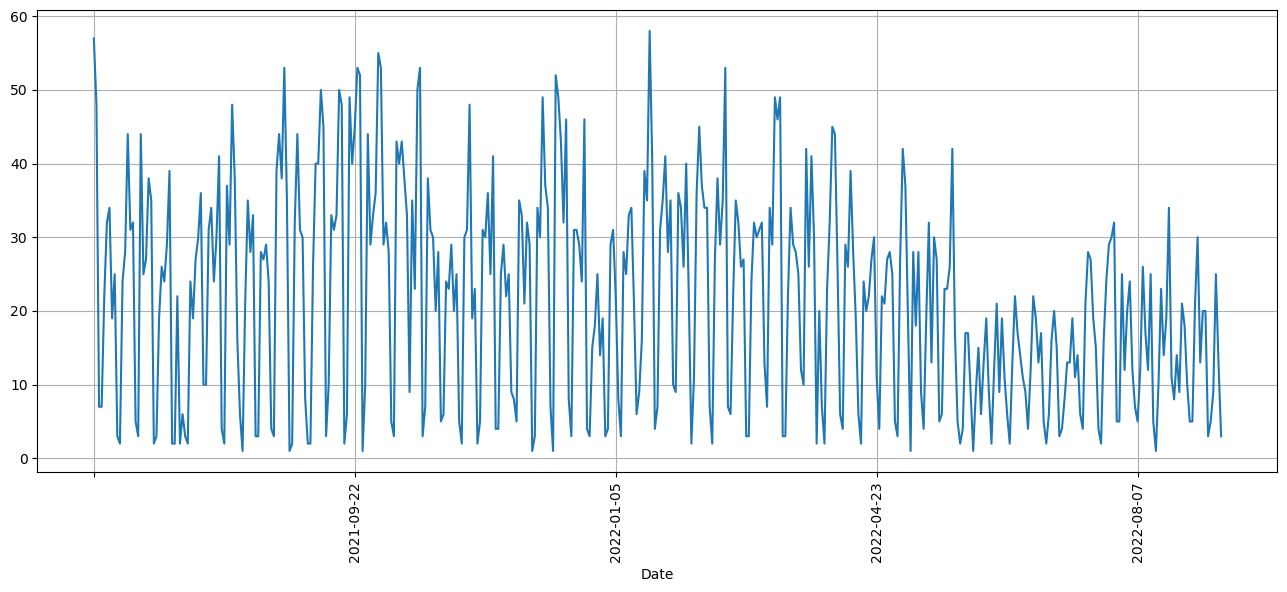

In [65]:
az_df.groupby('Date').size().plot(rot=90, figsize=[16,6],grid=True);